In [1]:
import numpy as np
import matplotlib.pyplot as plt

import GPy
from MFRBF import *

In [8]:
def f_low(x):
    return np.sin(8*np.pi*x)

num_cheap = 30
np.random.seed(59)

noise_level = 0.2

X1 = np.random.rand(num_cheap)[:,None]
Yc = f_low(X1) + noise_level * np.random.normal(0,1,num_cheap)[:,None]

Optimization restart 1/10, f = 16.905129431869735
Optimization restart 2/10, f = 32.74792722826898
Optimization restart 3/10, f = 32.7479327099501
Optimization restart 4/10, f = 16.905129431869234
Optimization restart 5/10, f = 32.74792685939853
Optimization restart 6/10, f = 32.74792880612384
Optimization restart 7/10, f = 32.74792687399204
Optimization restart 8/10, f = 32.74793371816065
Optimization restart 9/10, f = 32.74792863754084
Optimization restart 10/10, f = 32.747928455148646


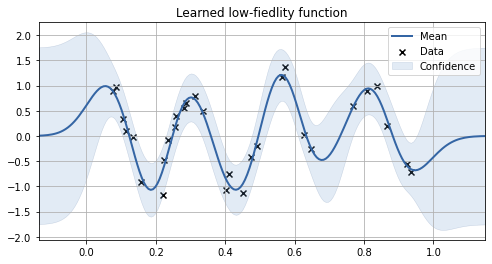

In [9]:
K1 = GPy.kern.RBF(input_dim = 1, variance = 1, lengthscale = 0.1)
m1 = GPy.models.GPRegression(X1, Yc, K1, noise_var = 0.0001)
m1.optimize(messages=True)
m1.optimize_restarts(num_restarts = 10)

fig, ax = plt.subplots(figsize=(8,4))
m1.plot(ax=ax)
plt.title('Learned low-fiedlity function')
plt.grid()

In [10]:
fig.savefig('low_f_large_v.pdf', bbox_inches='tight')

In [11]:
X = np.linspace(0.,1.,80) # 500 points evenly spaced over [0,1]
X = X[:,None] # reshape X to make it n*D

mu, v = m1.predict(X, full_cov = True)

<Figure size 432x288 with 0 Axes>

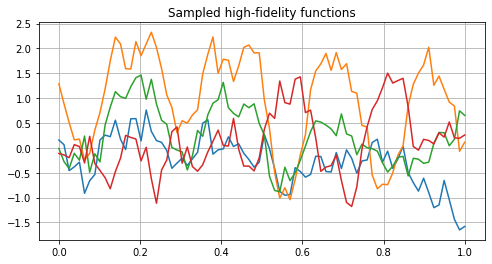

In [12]:
import pylab as pb
#pylab
pb.ion()

deepKern = MFRBF(input_dim=1, variance = 1, lengthscale = 1, mu = mu, v=v)
kRBF = GPy.kern.RBF(input_dim = 1)

effKern = kRBF * deepKern

C = effKern.K(X,X)

mu_mean = np.zeros((80))



ZRBF = np.random.multivariate_normal(mu_mean,C,4)
pb.figure() # open new plotting window

fig, ax = plt.subplots(figsize=(8,4))

for i in range(4):
    pb.plot(X[:],ZRBF[i,:])
    
plt.title('Sampled high-fidelity functions')
plt.grid()

In [13]:
fig.savefig('sample_large_v.pdf', bbox_inches='tight')